# Домашнее задание №2

<span style="color: red; font-size: 14pt">Дедлайн: 13 марта 23:59</span>

Машинное обучение, ФИВТ, Весна 2018

Составлено с использованием материалов Евгения Колмакова и Юрия Кашницкого (открытый курс машинного обучения, тема 3), а также лекций по машинному обучению Евгения Соколова

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall <номер_группы> <фамилия>``, к примеру -- ``ML2018_fall 596 ivanov``
- Выполненное дз сохраните в файл ``ML2018_<фамилия>_<группа>_task<номер задания>.ipnb``, к примеру -- ``ML2018_ivanov_596_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``

--------
- **PS1**: Используются автоматические фильтры, мы не найдем ваше дз, если вы укажете тему письма в неправильном формате.
- **PS2**: Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре

## Часть 0. Вопросы для самоконтроля

##### Перед выполнением задания убедитесь, что вы знаете ответы на этот теор.минимум
##### Эта часть задания не оценивается, ответы можно не записывать

1. Что такое решающее дерево? Как по построенному дереву найти прогноз для объекта?
2. Почему для любой выборки можно построить дерево, имеющее нулевую ошибку на ней? Приведите примеры.
3. Почему не рекомендуется строить небинарные деревья (имеющие более двух потомков у каждой вершины)?
4. Как устроен жадный алгоритм построения дерева?
5. Какие критерии информативности для решения задачи классификации вы знаете?
6. Какой смысл у критерия Джини и энтропийного критерия?
7. Какие критерии информативности для решения задачи регрессии вы знаете?
8. Что такое pruning (стрижка) дерева? Чем отличаются post-pruning и pre-pruning?
9. Какие методы обработки пропущенных значений вы знаете?
10. Как учитывать категориальные признаки в решающем дереве?
11. Что такое mean target encoding? Почему эта техника хорошо работает для решающих деревьев?
12. Как работает отбор признаков с помощью решающих деревьев?

## Часть 1. Теоретические задачи

##### 30% баллов за задание, оценочное время выполнения 1 час

##### Решение можно затехать здесь или написать от руки и добавить фото в ноутбук

### Задача 1 (10% баллов)

Какая стратегия поведения в листьях регрессионного дерева приводит к меньшему матожиданию ошибки по MSE: отвечать средним значением таргета на объектах обучающей выборки, попавших в лист, или отвечать таргетом для случайного объекта из листа (считая все объекты равновероятными)?

**Решение:**

Пусть $y^*$ - ответ, который мы даем в листе регрессионного дерева. Попробуем минимизировать матожидание ошибки по MSE:

$E(\frac{1}{n}\sum\limits_{i=1}^n (y_i - y^*)^2) = \frac{1}{n}\sum\limits_{i=1}^n E(y_i - y^*)^2$, раскрыли по линейности, а теперь возьмём производную от этого выражения и приравняем к нулю

Для отдельного слагаемого $E(y-y^*)^2 = E y^2 - 2y^* Ey + E (y^*)^2$

$(E y^2 - 2y^* Ey + E (y^*)^2)' = 2Ey - 2y^*$

Для суммы: $ \sum\limits_{i=1}^n (Ey_i - y^*) = 0$

$y^* = \frac{1}{n} \sum\limits_{i=1}^n Ey_i $

Следовательно, среднее значение таргета минимизирует матожидание ошибки по MSE.

### Задача 2 (15% баллов)

Критерий информативности для набора объектов $L$ вычисляется на основе того, насколько хорошо их целевые переменные предсказываются константой (при оптимальном выборе этой константы):
$$H(R) = \min_{c \in Y} \dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} L(y_i, c),$$
где $L(y_i, c)$- некоторая функция потерь. Соответственно, чтобы получить вид критерия при конкретной функции потерь, необходимо аналитически найти оптимальное значение константы и подставить его в формулу для $H(R)$.

Выведите критерии информативности для следующих функций потерь:
1. $L(y,c) = (y-c)^2$
2. $L(y,c) = \sum_{k=1}^K (c_k-[y=k])^2$
3. $L(y,c) = -\sum_{k=1}^K [y=k]\log c_k$

**Подсказка**:
должны получиться дисперия, критерий Джини и энтропийный критерий.

1) $L(y,c) = (y-c)^2$

Минимум в этом выражении достигается на среднем значении целевой переменной c. Значит, критерий можно переписать в следующем виде:

$$H(R) = \dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} (y_i - \dfrac{1}{|R|} \sum_{(x_j,y_j) \in R}y_j)^2,$$

Таким образом, мы получили, что информативность измеряется дисперсией.

2) $L(y,c) = \sum_{k=1}^K (c_k-[y=k])^2$

Дополнительно нам необходимо, чтобы $\sum_{k=1}^K c_k = 1$.

$$H(R) = min\dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} \sum_{k=1}^K(c_k-[y_i=k])^2$$

Покажем, что оптимальный вектор вероятностей состоит из долей классов $p_k: c_*=(p_1, ..., p_K)$

$$H(R) = \dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} \sum_{k=1}^K(p_k-[y_i=k])^2 = \dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} \sum_{k=1}^K(p_k^2-2 p_k [y_i=k] + [y_i=k]^2) = \sum_{k=1}^K(p_k^2-2p_k+p_k) = \sum_{k=1}^Kp_k(1-p_k)$$

Мы получили критерий Джини.

3) $L(y,c) = -\sum_{k=1}^K [y=k]\log c_k$

$$H(R) = min(-\dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} \sum_{k=1}^K[y_i=k]\log c_k)$$

Как и в предыдущем пункте, учитываем, что $\sum_{k=1}^K c_k = 1$.

Составим функцию лагранжа и найдем ее минимум:

$$L(c, \lambda) = -\dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} \sum_{k=1}^K[y_i=k]\log c_k + \lambda \sum_{k=1}^K c_k $$

$$\frac{\partial}{\partial c_k}L(c, \lambda) = -\dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} [y_i=k] \frac{1}{c_k} + \lambda = -\frac{p_k}{c_k} + \lambda = 0$$

Отсюда получаем, что $c_k = \frac{p_k}{\lambda}$.

Из того, что $\sum_{k=1}^K c_k = 1$ получаем равенство:

$$1 = \sum_{k=1}^K c_k = \sum_{k=1}^K \frac{p_k}{\lambda} = \frac{1}{\lambda}\sum_{k=1}^K p_k = \frac{1}{\lambda}$$

Следовательно, $\lambda = 1$. Т.е. минимум лагранжиана достигается на $c_k=p_k$. Подставим полученное значение в критерий информативности:

$$H(R) = -\dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} \sum_{k=1}^K[y_i=k]\log p_k = -\sum_{k=1}^K p_k\log p_k$$

Мы  получили энтропийный критерий.

### Задача 3 (5% баллов)

Запишите оценку сложности построения одного решающего дерева в зависимости от размера обучающей выборки $l$, числа признаков $d$, максимальной глубины дерева $D$. В качестве предикатов используются пороговые функции $[x_j>t]$. При выборе предиката в каждой вершине перебираются все признаки, а в качестве порогов рассматриваются величины $t$, равные значения этого признака на объектах, попавших в текущую вершину. Считайте сложность вычисления критерия информативноси константной.

**Решение:**
Сложность на 1-ом шаге будет $O(ld)$. На 2-ом шаге произойдет разделение дерева на 2 поддерева согласно критерию(константа). Пусть часть $m$ объектов после разделения перейдет в первое поддерево, а часть $1-m$ -- во второе. Тогда сложность в первом узле будет равной $mO(ld)$, а во 2-ом - $(1-m)O(ld)$, т.е. сложность этого уровня будет равной $O(ld)$. И так будет на каждом уровне. А т.к. максимальная глубина дерева $D$, то сложность дерева в худшем случае будет $O(ldD)$.

## Часть 2. Визуализация решающих деревьев

##### 20% баллов за задание, оценочное время выполнения 30 минут

Для начала нужно поставить GraphViz

- На macOS:
    - sudo pip install pydotplus
    - brew install graphviz
- Linux должно работать то же самое с заменой brew на sudo apt-get
    - sudo pip install pydotplus
    - sudo apt-get install graphviz
- Windows
    - Установить GraphViz отсюда: http://www.graphviz.org/Download_windows.php
    - Добавить путь к папке bin в PATH (например, "C:\Programs\Graphviz2.38\bin")
    - pip install pydotplus

Постройте решающее дерево из sklearn на датасете Car Evaluation Dataset (https://archive.ics.uci.edu/ml/datasets/car+evaluation)

In [1]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn import tree
import numpy as np
from sklearn import preprocessing
# Ваш код здесь

In [10]:
import os
GRAPHVIZ_INSTALL_BIN_DIR = r'C:\Program Files (x86)\Graphviz2.38\bin'
os.environ["PATH"] += os.pathsep + GRAPHVIZ_INSTALL_BIN_DIR

In [2]:
data = pd.read_csv("car.data")
car_data = pd.DataFrame(data)
car_data.columns = ['','buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'];
car_data.head()

,,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
car_data.columns[1:]

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

In [4]:
#Перекодируем категориальные признаки
def number_encode_features(init_df):
    result = init_df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

encoded_data, encoders = number_encode_features(car_data)
encoded_data.head()

,,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [5]:
encoded_data.columns[1:]

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

In [6]:
encoders

{'': LabelEncoder(),
 'buying': LabelEncoder(),
 'doors': LabelEncoder(),
 'lug_boot': LabelEncoder(),
 'maint': LabelEncoder(),
 'persons': LabelEncoder(),
 'safety': LabelEncoder()}

In [14]:
#Построим дерево
model = tree.DecisionTreeClassifier()
model.fit(encoded_data.iloc[:, 2:], encoded_data.buying)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Визуализируйте получившееся дерево с помощью GraphViz (следующая функция может помочь):

In [20]:
import IPython.display #needed to render in notebook
from sklearn.externals.six import StringIO  #needed to convert dot format to png
import pydot
from sklearn import tree

def draw_decision_tree(clf, column_names):
    dot_data = StringIO() 
    tree.export_graphviz(clf, out_file=dot_data, feature_names=column_names) 
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    a = IPython.display.Image(graph[0].create_png())
    IPython.display.display(a)

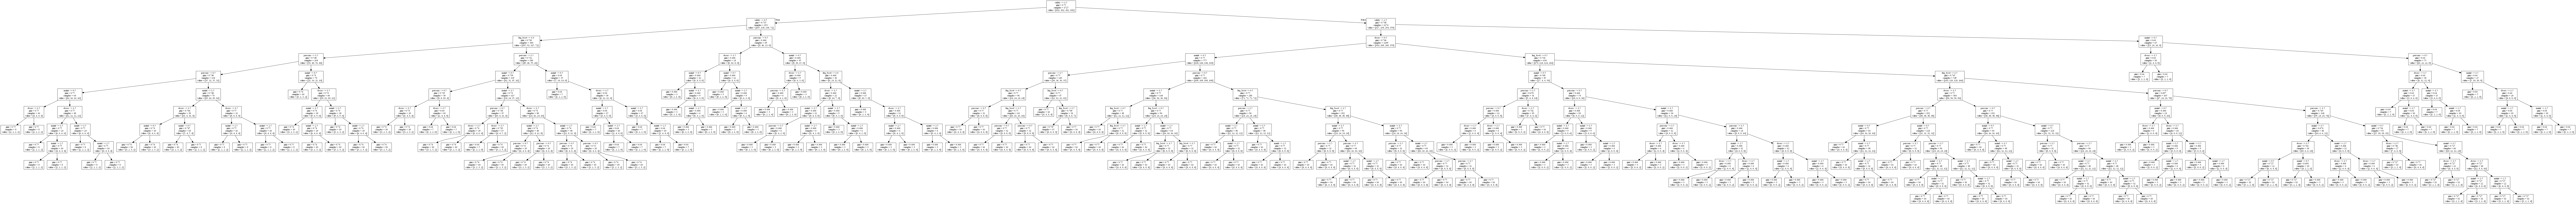

In [21]:
draw_decision_tree(model, encoded_data.columns[2:])

Посмотрите, как меняется картинка для различных значений структурных параметров (варьируйте параметры max_depth, criterion, min_samples_leaf, max_features). Убедитесь, что увеличение глубины дерева и уменьшение количества объектов в листьях способствует гибкости модели и, как следствие, переобучению (что соответствует интуитивным соображениям о структуре дерева).

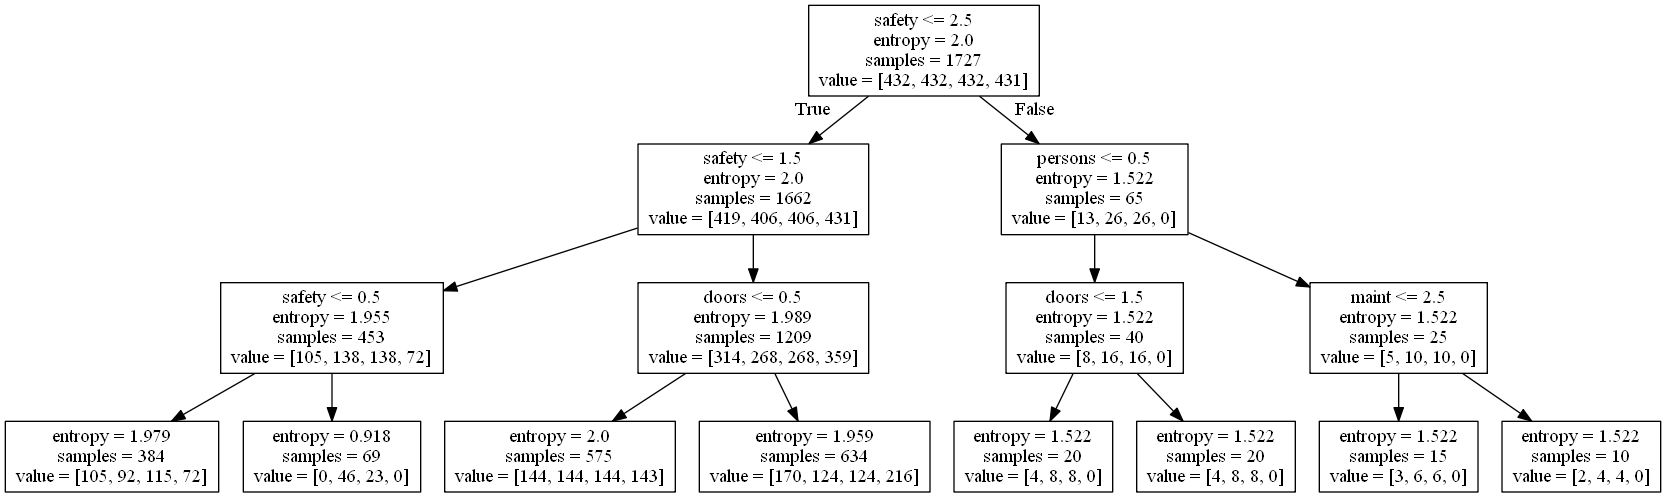

In [30]:
model = tree.DecisionTreeClassifier(max_depth=3, criterion="entropy", min_samples_leaf=7, max_features=3)
model.fit(encoded_data.iloc[:, 2:], encoded_data.buying)

draw_decision_tree(model, encoded_data.columns[2:])

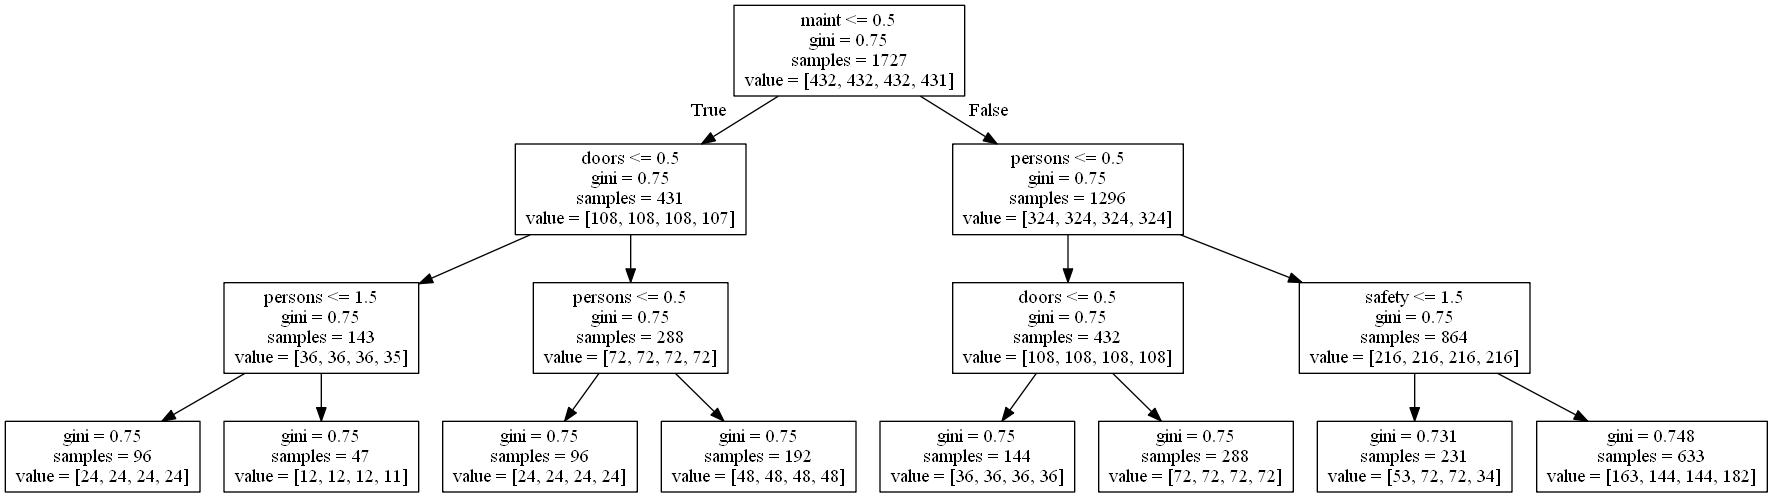

In [40]:
model = tree.DecisionTreeClassifier(max_depth=3, criterion="gini", min_samples_leaf=7, max_features=3)
model.fit(encoded_data.iloc[:, 2:], encoded_data.buying)

draw_decision_tree(model, encoded_data.columns[2:])

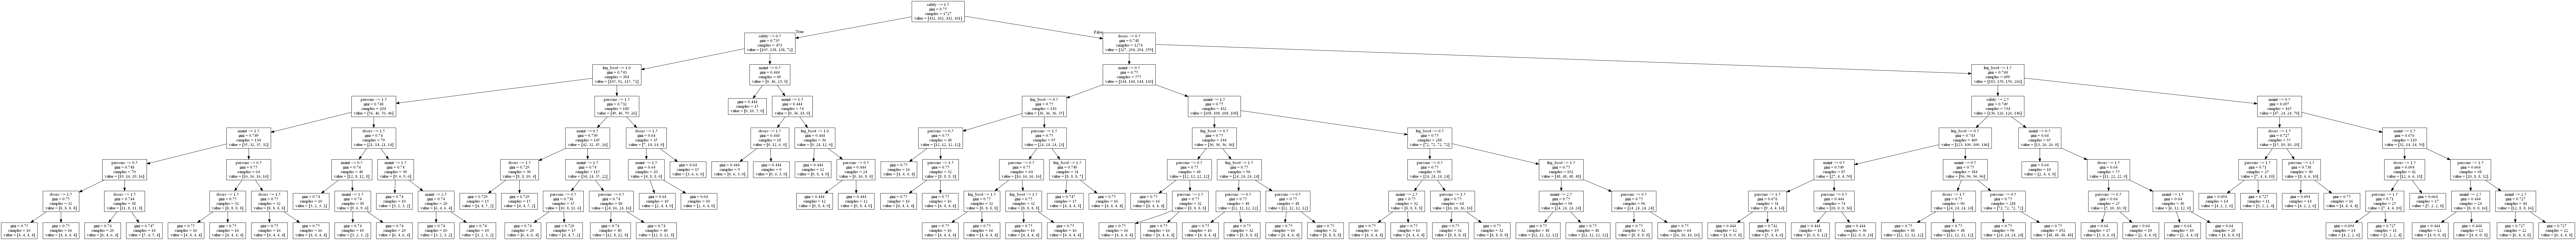

In [41]:
model = tree.DecisionTreeClassifier(max_depth=7, criterion="gini", min_samples_leaf=7, max_features=3)
model.fit(encoded_data.iloc[:, 2:], encoded_data.buying)

draw_decision_tree(model, encoded_data.columns[2:])

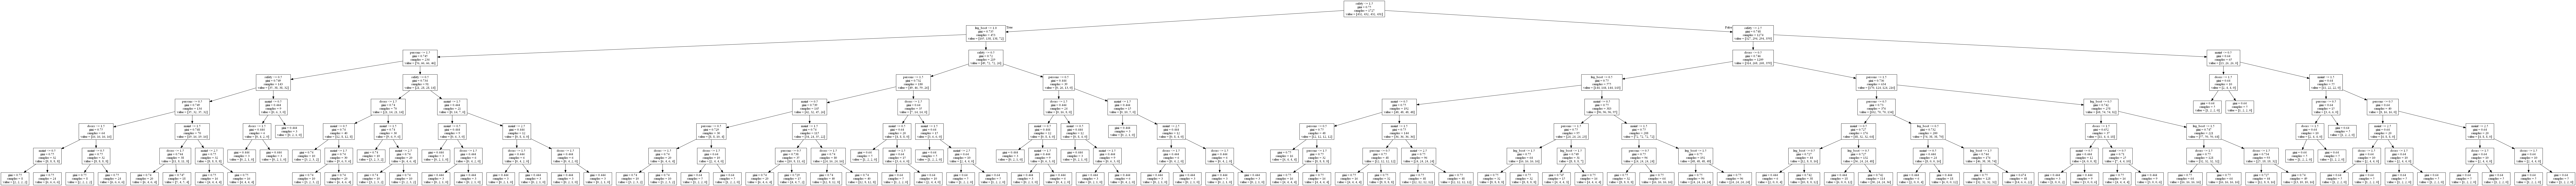

In [42]:
model = tree.DecisionTreeClassifier(max_depth=7, criterion="gini", min_samples_leaf=1, max_features=3)
model.fit(encoded_data.iloc[:, 2:], encoded_data.buying)

draw_decision_tree(model, encoded_data.columns[2:])

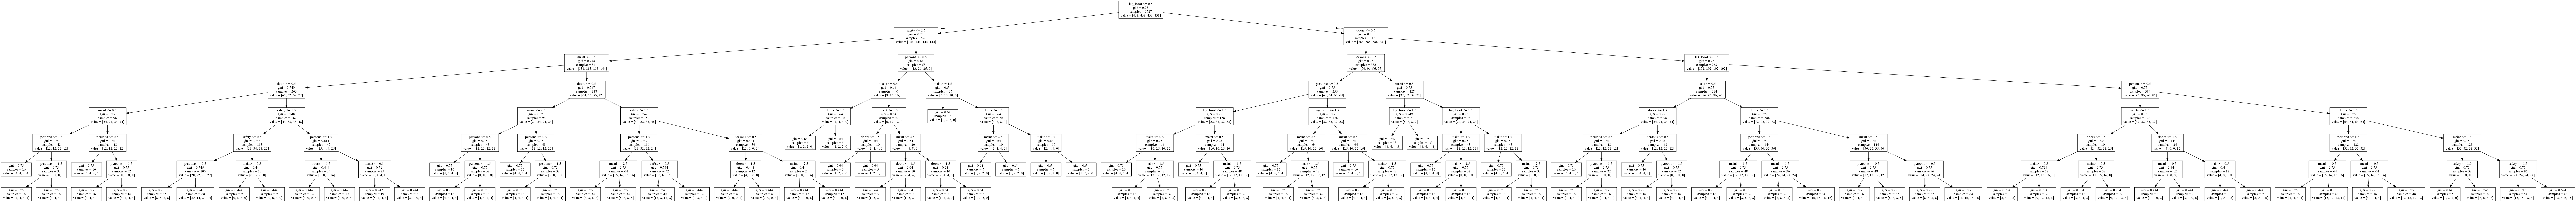

In [45]:
model = tree.DecisionTreeClassifier(max_depth=7, criterion="gini", min_samples_leaf=1, max_features=1)
model.fit(encoded_data.iloc[:, 2:], encoded_data.buying)

draw_decision_tree(model, encoded_data.columns[2:])

Таким образом, поварьировав параметры и построив несколько деревьев, мы наглядно убедились, что увеличение глубины дерева и уменьшение количества объектов в листьях действительно способствует переобучению.

## Часть 3. Реализация алгоритма построения дерева решений

##### 50% баллов за задание, оценочное время выполнения 2-3 часа

In [63]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.base import BaseEstimator
from sklearn.datasets import make_classification, make_regression, load_digits, load_boston
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error

Зафиксируем заранее `random_state` (a.k.a. random seed). Это должно повысить вероятность полной воспроизводимости результатов, впрочем, замечено, что тем не менее небольшие флуктуации возможны (например, качества прогнозов дерева, которое мы сейчас вырастим) в случае разных ОС.

In [64]:
RANDOM_STATE = 42

**Необходимо реализовать класс `DecisionTree`**

**Спецификация:**
- класс наследуется от `sklearn.BaseEstimator`;
- конструктор содержит следующие параметры: 
    `max_depth` - максимальная глубина дерева (по умолчанию - `numpy.inf`); 
    `min_samples_split` - минимальное число объектов в вершине, при котором происходит её разбиение (по умолчанию - 2); 
    `criterion` - критерий разбиения (для классификации - 'gini' или 'entropy', для регрессии - 'variance' или 'mad_median'; 
    по умолчанию - 'gini');
    
    Функционал, значение которого максимизируется для поиска оптимального разбиения в данной вершине имеет вид
    $$Q(X, j, t) = F(X) - \dfrac{|X_l|}{|X|} F(X_l) - \dfrac{|X_r|}{|X|} F(X_r),$$
    где $X$ - выборка, находящаяся в текущей вершине, $X_l$ и $X_r$ - разбиение выборки $X$ на две части 
    по предикату $[x_j < t]$, а $F(X)$ -критерий разбиения.
    
    1. Для классификации: пусть $p_i$ - доля объектов $i$-го класса в выборке $X$.
    
        - 'gini': Неопределенность Джини $F(X) = 1 -\sum_{i = 1}^K p_i^2$.
    
        - 'entropy': Энтропия $F(X) = -\sum_{i = 1}^K p_i \log_2(p_i)$.
    
    2. Для регрессии: $y_j = y(x_j)$ - ответ на объекте $x_j$, $y = (y_1, \dots, y_{|X|})$ - вектор ответов.
    
        - 'variance': Дисперсия (среднее квадратичное отклонение от среднего) $F(X) = \dfrac{1}{|X|} \sum_{x_j \in X}(y_j - \dfrac{1}{|X|}\sum_{x_i \in X}y_i)^2$
    
        - 'mad_median': Среднее отклонение от медианы $F(X) = \dfrac{1}{|X|} \sum_{x_j \in X}|y_j - \mathrm{med}(y)|$
    
- класс имеет методы `fit`, `predict` и `predict_proba`;
- метод `fit` принимает матрицу объектов `X` и вектор ответов `y` (объекты `numpy.ndarray`) и возвращает экземпляр класса
    `DecisionTree`, представляющий собой решающее дерево, обученное по выборке `(X, y)` с учётом заданных в конструкторе параметров; 
- метод `predict_proba` принимает матрицу объектов `X` и возвращает матрицу `P` размера `X.shape[0] x K`, где `K` - число классов, такую что $p_{ij}$ есть вероятность принадлежности объекта, заданного $i$-ой строкой матрицы X к классу $j \in \{1, \dots, K\}$.
- метод `predict` принимает матрицу объектов и возвращает вектор предсказанных ответов; в случае классификации - это 
    наиболее многочисленный класс в листе, в который попал объект, а в случае регрессии - среднее значение ответов по 
    всем объектам этого листа;

**Советы по реализации:**

- Обучение дерева можно реализовать простым жадным рекурсивным алгоритмом: каждый раз выбирать наилучшее разбиение (номер признака и порог по нему).
- Если возможных порогов для разбиения будет слишком много, выбор наилучшего разбиения окажется вычислительно очень громоздкой задачей. Можно ограничить множество порогов любым удобным способом (например, посчитать квантили значений каждого признака или просто взяв случайный набор порогов).
- Лучше не подсматривать решение в готовых нагугленных вариантах. От вас требуется сделать всего лишь максимально простую реализацию того, как строится и применяется решающее дерево, а не применимую на практике универсальную библиотеку.

### Реализация (30% баллов)

In [133]:
def entropy(labels):  
    classes = np.unique(labels)
    result = 0
    for cur_class in classes:
        p = np.mean(labels == cur_class)
        result -= p * np.log2(p)

    return result

In [89]:
def gini(labels):
    classes = np.unique(labels)
    result = 0
    for cur_class in classes:
        p = np.mean(labels == cur_class)
        result += p ** 2

    return 1 - result

In [91]:
class Node:
    def __init__(self, data=0, feature='', threshold=0, left=None, right=None):
        self.data = data
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right

In [205]:
def majority(arr):
    dictionary = {}
    max_freq = 0
    index = 0 # Максимальная частота и индекс в словаре
    for elem in arr: # Пробегаем в цикле исходный массив
        if (elem in dictionary):
            dictionary[elem] += 1
        else:
            dictionary[elem] = 1 # Если ключ уже есть, прибавляем 1, если нет, записываем 1
        if (dictionary[elem] > max_freq):
            max_freq = dictionary[elem]
            index = elem # Запоминаем максимум и его индекс
    return index

In [206]:
class DecisionTree(BaseEstimator):
    def __init__(self, features, max_depth=np.inf, min_samples_split=2, 
                 criterion='gini', debug=False):
        
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split 
        self.criterion = criterion
        self.debug = debug
        self.features = features
    
    def __builder(self, X_train, y_train, cur_depth):#sub_sample_indices
        answers = np.array(y_train)
        size = len(y_train)
        
        # если в X_train мало элементов или превышена максимальная глубина, то объединяем все элементы в лист
        # и в ответе даем значение большинства
        if (size <= self.min_samples_split or (self.max_depth != 0 and cur_depth >= self.max_depth)):
            
            new_leaf = Node(majority(answers))
            new_leaf.num = size
            return new_leaf;
        
        X_copy = X_train.copy()
        X_copy.insert(0, 'target', y_train)
                
        best_Q = -np.inf
        best_feat = ''
        best_thr = 0
        for feature in self.features:
            
            # переберем все значения признака
            values = np.array(X_train[feature])
            thresholds = np.unique(values)

            for threshold in thresholds: 
                # находим наиболее удачное разбиение, пользуясь заданным критерием
                y_left = X_copy[X_copy[feature] <= threshold].target
                y_right = X_copy[X_copy[feature] > threshold].target
                if (len(y_left) != 0 and len(y_right) != 0):
                    new_Q = self.Q(y_left, y_right)
                    if (new_Q > best_Q):
                        best_Q = new_Q
                        best_feat = feature
                        best_thr = threshold
       
        # разбиваем выборку на две части с помощью найденного разбиения
        X_train_0 = X_copy[X_copy[best_feat] <= best_thr]
        X_train_1 = X_copy[X_copy[best_feat] > best_thr]
        
        # если мы так неудачно разбили, что в одном множестве совсем не оказалось элементов или их оказалось мало,
        # то создаем новый лист
        if (len(X_train_0) <= 5 or len(X_train_1) <= 5):
            if len(X_train_0) <= 5:
                new_leaf = Node(X_train_1.target.mean())
                return new_leaf;
            else:
                new_leaf = Node(X_train_0.target.mean())
                return new_leaf;
 
        # иначе создаем новую вершину  и продолжаем построение дерева
        new_vertex = Node(0, best_feat, best_thr)
        new_vertex.left = self.__builder(X_train_0.iloc[:, 1:], X_train_0.target, cur_depth+1)
        new_vertex.right = self.__builder(X_train_1.iloc[:, 1:], X_train_1.target, cur_depth+1)
        
        return new_vertex;
    
    def Q(self, X_left, X_right):
        X = np.concatenate([X_left, X_right])
        
        if (self.criterion == 'entropy'):
            return entropy(X) - len(X_left) / len(X) * entropy(X_left) - len(X_right) / len(X) * entropy(X_right)
        
        if (self.criterion == 'variance'):
            return variance(X) - len(X_left) / len(X) * variance(X_left) - len(X_right) / len(X) * variance(X_right)
        
        if (self.criterion == 'mad_median'):
            return mad_median(X) - len(X_left) / len(X) * mad_median(X_left) - len(X_right) / len(X) * mad_median(X_right) 
        
        return gini(X) - len(X_left) / len(X) * gini(X_left) - len(X_right) / len(X) * gini(X_right) 
        
    
    def __find(self, x, cur_vertex):

        if (cur_vertex.feature != ''):
            if x[cur_vertex.feature] <= cur_vertex.threshold:
                return self.__find(x, cur_vertex.left);
            else:
                return self.__find(x, cur_vertex.right);
        else:
            return cur_vertex.data
        
    def fit(self, X_train, y_train):
        
        self.root = self.__builder( X_train, y_train, 0)
        
        
    def predict(self, X_test):
        
        size = len(X_test)
        y_pred = np.zeros(size)
        
        for i in range(0, size-1):
            y_pred[i] = self.__find(X_test.iloc[i], self.root)
       
        return y_pred

In [78]:
from sklearn.cross_validation import train_test_split

## Тестирование реализованного алгоритма

### Классификация (10% баллов)

С помощью метода `load_digits` загрузите датасет `digits`. Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Попробуйте обучить неглубокие решающие деревья и убедитесь, что критерии gini и entropy дают разные результаты.

In [93]:
from sklearn.datasets import load_digits

In [207]:
digits = load_digits()

In [98]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [208]:
digits_data = pd.DataFrame(digits.data)
digits_data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [209]:
train_data, test_data, train_target, test_target = train_test_split(digits_data.iloc[:, :-1], digits_data[:][63],
                                                                   test_size = 0.2, random_state=42)

In [210]:
clf1 = DecisionTree(features=digits_data.iloc[:0].columns[:-1],max_depth=5,criterion='gini')
clf1.fit(train_data, train_target)

In [211]:
predict1 = clf1.predict(test_data)
print("max depth=5 ", sum((predict1 - test_target)**2)/len(predict1))

max depth=5  1.4141918689798245


In [212]:
clf2 = DecisionTree(features=digits_data.iloc[:0].columns[:-1],max_depth=5, criterion='entropy')
clf2.fit(train_data, train_target)

In [215]:
predict2 = clf2.predict(test_data)
print("max depth=5 ", sum((predict2 - test_target)**2)/len(predict2))

max depth=5  0.7764226447508318


С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `max_depth` и `criterion`. Для параметра `max_depth` используйте диапазон значений - range(3, 11), а для criterion - {'gini', 'entropy'}. Критерий качества `scoring`='accuracy'.

In [214]:
#Оно падает с ошибкой. Stackoverflow бессилен.
gs = GridSearchCV(
    DecisionTree(features=digits_data.iloc[:0].columns[:-1].values),
    param_grid ={
        'criterion': ['gini', 'entropy'],
        'max_depth': range(3, 11)
    },
    scoring='accuracy'
)

gs.fit(digits_data.iloc[:, :-1], digits_data[:][63])

print(gs.best_params_)
print(gs.best_score_)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

Постройте графики средних значений критерия качества `accuracy` для критериев `gini` и `entropy` в зависимости от `max_depth`.

In [ ]:
# Ваш код здесь

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров max_depth и criterion?

In [ ]:
# Ваш ответ здесь

Используя найденные оптимальные значения max_depth и criterion, обучите решающее дерево на X_train, y_train и вычислите вероятности принадлежности к классам для X_test.

In [ ]:
# Ваш код здесь

Для полученной матрицы вычислите усредненные по всем объектам из `X_test` значения вероятностей принадлежности к классам.

Чему примерно равна максимальная вероятность в полученном векторе?

In [1]:
# Ваш ответ здесь

### Регрессия (10% баллов)

С помощью метода `load_boston` загрузите датасет `boston`. Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Попробуйте обучить неглубокие регрессионные деревья и убедитесь, что критерии `variance` и `mad_median` дают разные результаты.

In [191]:
from sklearn.datasets import load_boston

In [192]:
boston = load_boston()

In [193]:
boston_data = pd.DataFrame(boston.data)
boston_data.columns = boston.feature_names
boston_data['target'] = boston.target

In [194]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [196]:
boston_train_data, boston_test_data, boston_train_target, boston_test_target = train_test_split(boston_data.iloc[:, :-1], 
                                                                                                boston_data.target, 
                                                                                                test_size = 0.2,
                                                                                                random_state=42)

С помощью 5-кратной кросс-валидации подберите оптимальное значение параметров `max_depth` и `criterion`. Для параметра `max_depth` используйте диапазон значений - `range(2, 9)`, а для `criterion` - {'variance', 'mad_median'}. Критерий качества `scoring`='neg_mean_squared_error'.

Постройте графики средних значений критерия качества `neg_mean_squared_error` для критериев `variance` и `mad_median` в зависимости от `max_depth`.

In [ ]:
# Ваш код здесь

In [ ]:
Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров max_depth и criterion?

In [2]:
# Ваш ответ здесь